##Installations and imports

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
import warnings
from google.colab import drive
from imblearn.over_sampling import SMOTE
drive.mount('/content/drive')
warnings.filterwarnings('ignore')
nltk.download('all')


/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Mounted at /content/drive


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

##Loading the Dataset


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML_Project/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
data.describe(include='O')

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'It has been too long since I have been on per...
freq,1832,1


##EDA

In [ ]:
data['type'].value_counts()

,count
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
train_data,test_data=train_test_split(data,test_size=0.25,random_state=35,stratify=data.type)

##Text Preprocessing

In [ ]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()

        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)

        sentence=re.sub('[^0-9a-z]',' ',sentence)


        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length
test_data.posts,test_length=clear_text(test_data)
train_data.posts,train_length=clear_text(train_data)

100%|██████████| 6506/6506 [00:03<00:00, 1823.60it/s]


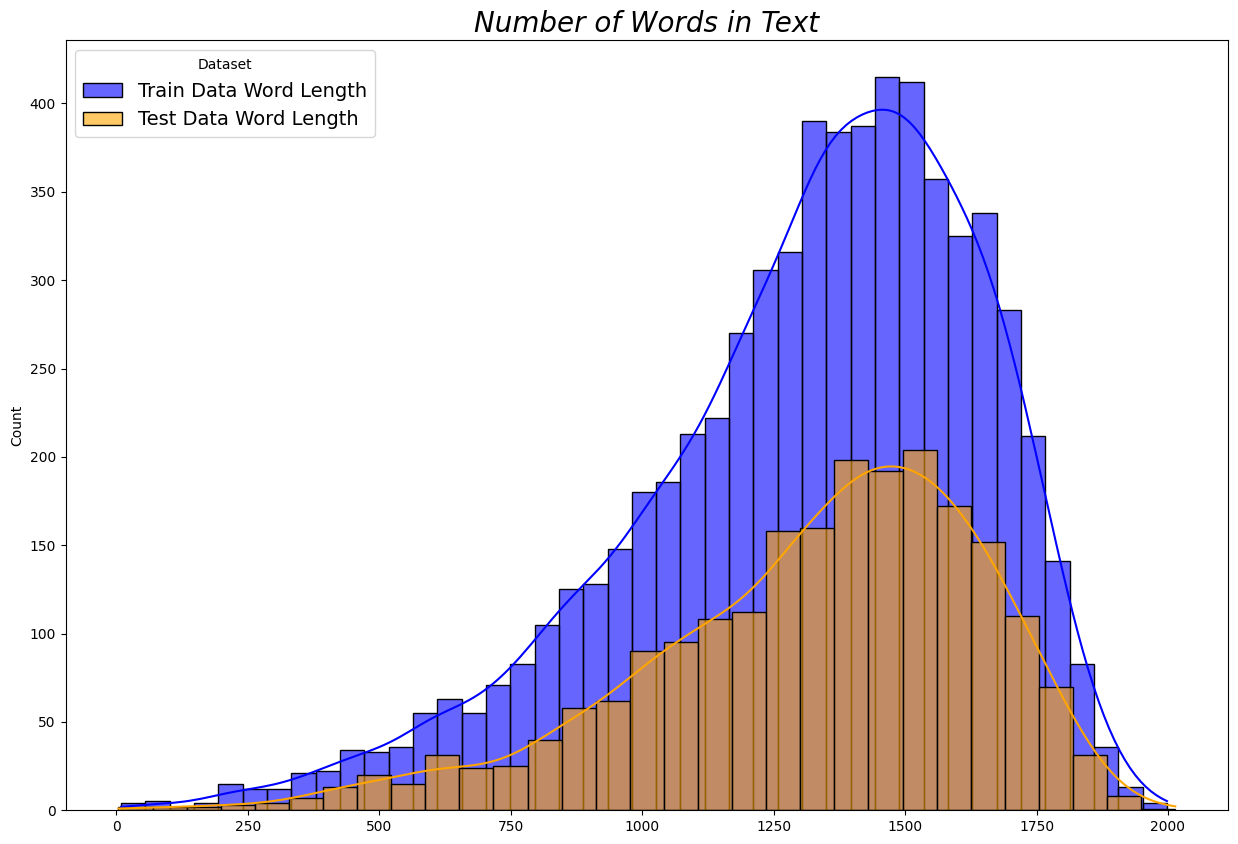

In [ ]:
plt.figure(figsize=(15, 10))

sns.histplot(train_length, label="Train Data Word Length", kde=True, color="blue", alpha=0.6)
sns.histplot(test_length, label="Test Data Word Length", kde=True, color="orange", alpha=0.6)

plt.title("Number of Words in Text", fontsize=20, style="italic")
plt.legend(title="Dataset", fontsize=14)

plt.show()

In [ ]:
fig = px.pie(train_data,names='type',title='Personality type',
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_font_size=20, title_x=0.5,
                  showlegend=True, legend_title="Type")

fig.show()

##Lemmatization and Tokenization

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=lemmatize_text)
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<function lemmatize_text at 0x7cd0d0b163e0>)

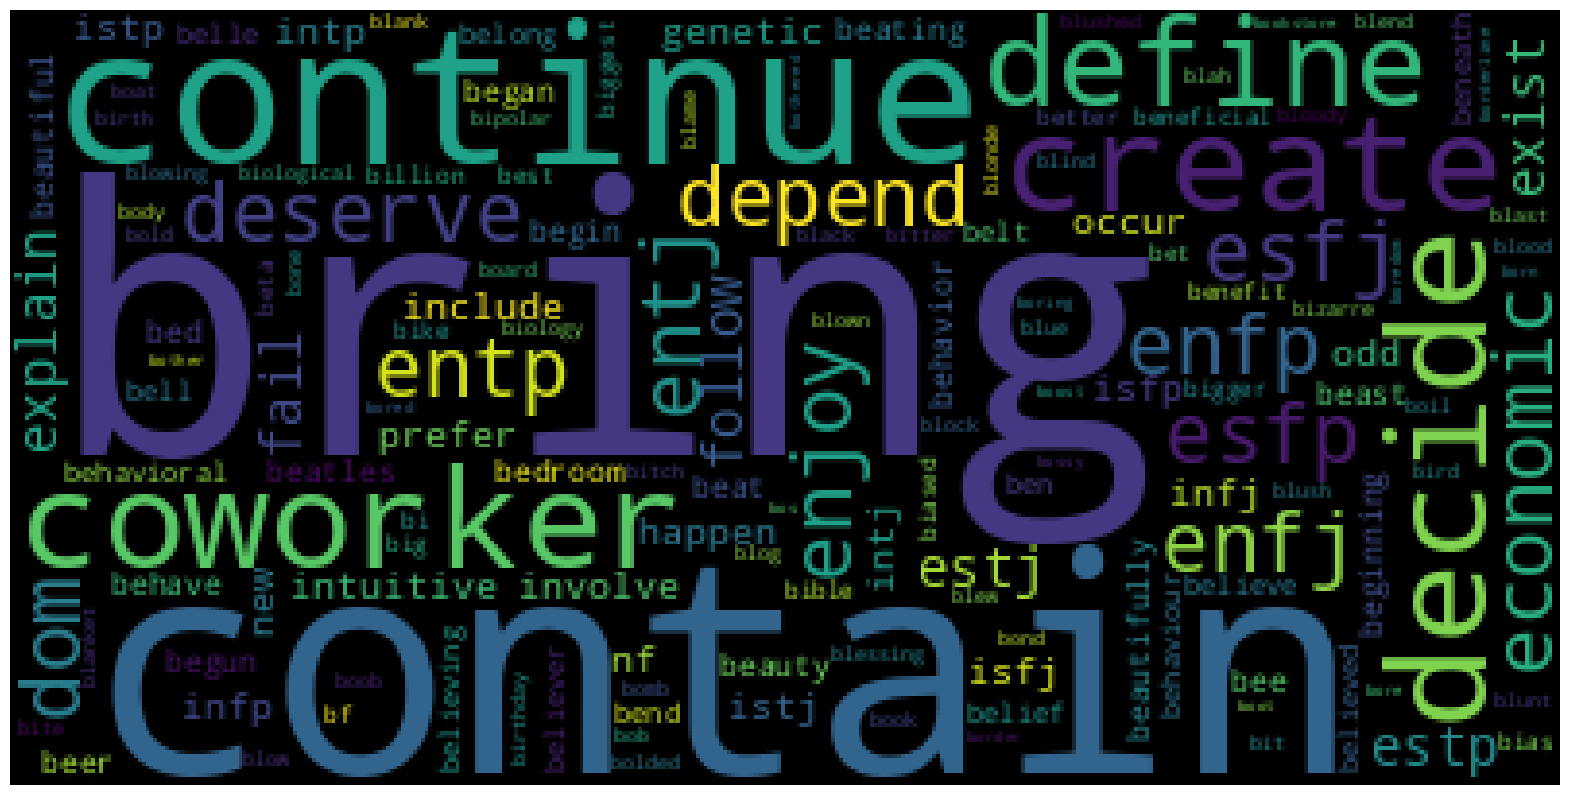

In [ ]:
feature_names = vectorizer.get_feature_names_out()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

In [ ]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

##Encoding Target Labels

In [ ]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

##Handling Class Imbalance Using SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(train_post, train_target)
y_train_res_series = pd.Series(y_train_res)
print(y_train_res_series.value_counts())


11    1374
8     1374
9     1374
2     1374
0     1374
10    1374
15    1374
3     1374
7     1374
12    1374
1     1374
14    1374
13    1374
5     1374
4     1374
6     1374
Name: count, dtype: int64


##Logistic Regression

In [ ]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(X_train_res,y_train_res)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [ ]:
print('Train Classification Report \n ',classification_report(y_train_res,model_log.predict(X_train_res),target_names=target_encoder.inverse_transform([i for i in range(16)])))

Train Classification Report 
                precision    recall  f1-score   support

        ENFJ       0.96      0.96      0.96      1374
        ENFP       0.91      0.88      0.89      1374
        ENTJ       0.97      0.95      0.96      1374
        ENTP       0.89      0.87      0.88      1374
        ESFJ       0.99      1.00      0.99      1374
        ESFP       0.98      1.00      0.99      1374
        ESTJ       0.99      1.00      0.99      1374
        ESTP       0.98      1.00      0.99      1374
        INFJ       0.86      0.80      0.83      1374
        INFP       0.82      0.83      0.82      1374
        INTJ       0.87      0.86      0.87      1374
        INTP       0.86      0.89      0.88      1374
        ISFJ       0.96      0.97      0.97      1374
        ISFP       0.95      0.95      0.95      1374
        ISTJ       0.96      0.97      0.97      1374
        ISTP       0.95      0.95      0.95      1374

    accuracy                           0.93     2

In [ ]:
print('Test Classification Report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))


Test Classification Report 
               precision    recall  f1-score   support

        ENFJ       0.53      0.54      0.54        48
        ENFP       0.70      0.62      0.66       169
        ENTJ       0.61      0.48      0.54        58
        ENTP       0.65      0.64      0.64       171
        ESFJ       0.86      0.60      0.71        10
        ESFP       0.14      0.17      0.15        12
        ESTJ       0.38      0.30      0.33        10
        ESTP       0.65      0.68      0.67        22
        INFJ       0.78      0.66      0.72       368
        INFP       0.73      0.80      0.76       458
        INTJ       0.68      0.71      0.69       273
        INTP       0.69      0.74      0.71       326
        ISFJ       0.76      0.71      0.73        41
        ISFP       0.69      0.56      0.62        68
        ISTJ       0.67      0.73      0.70        51
        ISTP       0.67      0.81      0.73        84

    accuracy                           0.70      21

In [ ]:
logistic_model_accuracy = accuracy_score(test_target,model_log.predict(test_post))
logistic_model_accuracy

0.6966343937298294

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming test_target contains the true labels and model_log is your trained model
unique_classes = model_log.classes_
test_target_binarized = label_binarize(test_target, classes=unique_classes)

# Predict probabilities for all classes
y_pred_proba = model_log.predict_proba(test_post)

# Calculate the ROC AUC score with One-vs-Rest (OvR) strategy
logistic_model_auc = roc_auc_score(test_target_binarized, y_pred_proba, multi_class='ovr')
print(f"Logistic Regression Multiclass ROC AUC Score (OvR): {logistic_model_auc}")



Logistic Regression Multiclass ROC AUC Score (OvR): 0.923651248959328


##Multinomial Naive Bayes

Naive Bayes model trained on Original Data

In [ ]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB()

In [ ]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       142
        ENFP       0.91      0.02      0.04       506
        ENTJ       0.00      0.00      0.00       173
        ENTP       0.82      0.05      0.10       514
        ESFJ       0.00      0.00      0.00        32
        ESFP       0.00      0.00      0.00        36
        ESTJ       0.00      0.00      0.00        29
        ESTP       0.00      0.00      0.00        67
        INFJ       0.52      0.61      0.56      1102
        INFP       0.34      0.94      0.50      1374
        INTJ       0.85      0.35      0.49       818
        INTP       0.60      0.63      0.61       978
        ISFJ       0.00      0.00      0.00       125
        ISFP       0.00      0.00      0.00       203
        ISTJ       0.00      0.00      0.00       154
        ISTP       0.00      0.00      0.00       253

    accuracy                           0.44      

In [ ]:
accuracy_score(test_target,model_multinomial_nb.predict(test_post))

0.35131396957123096

In [ ]:
y_test_binary = label_binarize(test_target, classes=range(len(target_encoder.classes_)))
y_pred_prob = model_multinomial_nb.predict_proba(test_post)
auc_roc = roc_auc_score(y_test_binary, y_pred_prob, average='macro', multi_class='ovr')
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.7465306940801568


Naive bayes Model trained on smote data

In [ ]:
model_multinomial_nb_smote=MultinomialNB()
model_multinomial_nb_smote.fit(X_train_res,y_train_res)

MultinomialNB()

Classification report and accuracy calculation of NB model trained on smote data on the original train and test data

In [ ]:
#### classification report on the ORIGINAL train and test data
print('train classification report \n ',classification_report(train_target,model_multinomial_nb_smote.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb_smote.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.52      0.87      0.65       142
        ENFP       0.62      0.76      0.68       506
        ENTJ       0.56      0.82      0.66       173
        ENTP       0.71      0.72      0.72       514
        ESFJ       0.74      1.00      0.85        32
        ESFP       0.57      1.00      0.73        36
        ESTJ       0.97      0.97      0.97        29
        ESTP       0.80      0.99      0.89        67
        INFJ       0.82      0.67      0.74      1102
        INFP       0.75      0.71      0.73      1374
        INTJ       0.80      0.72      0.76       818
        INTP       0.79      0.77      0.78       978
        ISFJ       0.78      0.80      0.79       125
        ISFP       0.70      0.78      0.74       203
        ISTJ       0.84      0.84      0.84       154
        ISTP       0.77      0.82      0.80       253

    accuracy                           0.74      

In [ ]:
accuracy_score(test_target,model_multinomial_nb_smote.predict(test_post))

0.5085292761641309

In [ ]:
y_test_binary = label_binarize(test_target, classes=range(len(target_encoder.classes_)))
y_pred_prob = model_multinomial_nb_smote.predict_proba(test_post)
auc_roc = roc_auc_score(y_test_binary, y_pred_prob, average='macro', multi_class='ovr')
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.8525119193382997


##Vanilla LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adjusting optimizer and learning rate
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate

# Building the model with more units in LSTM and increased embedding dimension
def build_lstm_model(input_dim, output_dim, max_sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_sequence_length))
    model.add(LSTM(256, return_sequences=False))  # Increased LSTM units
    model.add(Dropout(0.5))
    model.add(Dense(len(target_encoder.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Pad the sequences for LSTM model
max_sequence_length = max([len(post.split()) for post in train_data.posts])  # Find the longest sentence in train_data

# Pad the resampled data (X_train_res)
X_train_res_pad = pad_sequences(X_train_res, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_res_pad = pad_sequences(test_post, maxlen=max_sequence_length, padding='post', truncating='post')

# Build the model
input_dim = len(vectorizer.get_feature_names_out())  # Size of vocabulary
output_dim = 100
lstm_model = build_lstm_model(input_dim, output_dim, max_sequence_length)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train_res_pad, y_train_res, epochs=5, batch_size=64,
                         validation_data=(X_test_res_pad, test_target),
                         callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = lstm_model.evaluate(X_test_res_pad, test_target)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Predict using the model
y_pred = np.argmax(lstm_model.predict(X_test_res_pad), axis=1)

# Display classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_target, y_pred, target_names=target_encoder.classes_))
print(confusion_matrix(test_target, y_pred))


Epoch 1/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 56s 141ms/step - accuracy: 0.0630 - loss: 2.7732 - val_accuracy: 0.0221 - val_loss: 2.7732
Epoch 2/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 78s 143ms/step - accuracy: 0.0582 - loss: 2.7730 - val_accuracy: 0.0189 - val_loss: 2.7745
Epoch 3/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 83s 145ms/step - accuracy: 0.0625 - loss: 2.7732 - val_accuracy: 0.0779 - val_loss: 2.7741
Epoch 4/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.0645 - loss: 2.7729 - val_accuracy: 0.0788 - val_loss: 2.7751
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.0206 - loss: 2.7731
Test Loss: 2.773249626159668, Test Accuracy: 0.02213001437485218
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
              precision    recall  f1-score   support

        ENFJ       0.02      1.00      0.04        48
        ENFP       0.00      0.00      0.00       169
        ENTJ       0.00      0.00      0.00        58
        ENTP       0.00      0.00      0.00       171
        ESFJ       0.00      0

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Predict using the model
y_pred = np.argmax(lstm_model.predict(X_test_res_pad), axis=1)

# Accuracy
accuracy = accuracy_score(test_target, y_pred)
print(f"Accuracy: {accuracy}")

# F1-Score (Macro avg and Weighted avg)
report = classification_report(test_target, y_pred, target_names=target_encoder.classes_, output_dict=True)
macro_f1 = report['macro avg']['f1-score']
weighted_f1 = report['weighted avg']['f1-score']
print(f"Macro F1-Score: {macro_f1}")
print(f"Weighted F1-Score: {weighted_f1}")

# AUC-ROC (compute the AUC for each class)
# Since we have multi-class classification, we need to binarize the labels
y_test_bin = label_binarize(test_target, classes=range(len(target_encoder.classes_)))
y_pred_prob = lstm_model.predict(X_test_res_pad)  # Predict probability scores
auc_roc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')
print(f"AUC-ROC: {auc_roc}")
